In [ ]:
import numpy as np
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/datasets/Data_Advertising.csv')

X = np.array(data[['TV','radio','newspaper']])
Y = np.array(data['sales'])

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ntrain = int(0.8 * len(X))
xtrain,xtest,ytrain,ytest = X[:ntrain],X[ntrain:],Y[:ntrain],Y[ntrain:]

In [ ]:
dtr = DecisionTreeRegressor(max_depth=6)

In [ ]:
abdtr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6))

In [ ]:
dtr.fit(xtrain,ytrain)
ytest_predict_dtr = dtr.predict(xtest)
print("Mean Squared Error :",round(mean_squared_error(ytest,ytest_predict_dtr),2))
print("Explained Variance Score :",round(explained_variance_score(ytest,ytest_predict_dtr),2))

Mean Squared Error : 1.06
Explained Variance Score : 0.96


In [ ]:
abdtr.fit(xtrain,ytrain)
ytest_predict_abdtr = abdtr.predict(xtest)
print("Mean Squared Error :",round(mean_squared_error(ytest,ytest_predict_abdtr),2))
print("Explained Variance Score :",round(explained_variance_score(ytest,ytest_predict_abdtr),2))

Mean Squared Error : 0.6
Explained Variance Score : 0.98


In [ ]:
feature_importances = dtr.feature_importances_
feature_names = list(data.columns.values[1:])



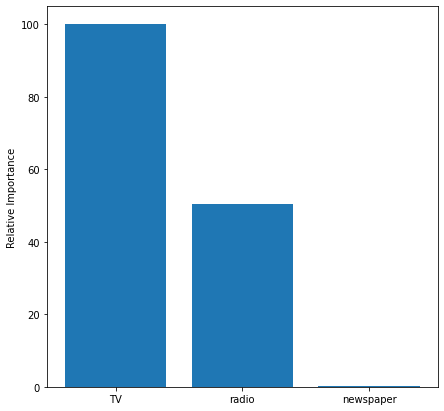

In [ ]:
feature_importances = 100.0 * feature_importances/max(feature_importances)
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0])
rcParams['figure.figsize'] =7,7
plt.bar(pos,feature_importances[index_sorted])
plt.xticks(pos,feature_names)
plt.ylabel('Relative Importance')

plt.show()

In [ ]:
feature_importances = abdtr.feature_importances_
feature_names = list(data.columns.values[1:])
title = 'AdaBoost Decision Tree Regressor'

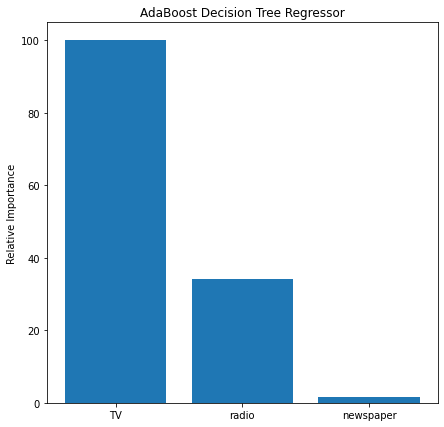

In [ ]:
feature_importances = 100.0 * feature_importances/max(feature_importances)
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0])
rcParams['figure.figsize'] =7,7
plt.bar(pos,feature_importances[index_sorted])
plt.xticks(pos,feature_names)
plt.ylabel('Relative Importance')
plt.title(title)
plt.show()